This notebook is mainly to debug the dataset and to see how the data is distributed. It is also used to generate the dataset statistics.

In [1]:
import csv

import numpy as np  # numerical computing
import pandas as pd  # data analysis, working with DataFrames
import seaborn as sns
from nltk.corpus import stopwords

def remove_stopwords(input_text):
    """
    Function to remove English stopwords from a Pandas Series.

    Parameters:
        input_text : text to clean
    Output:
        cleaned Pandas Series
    """
    stopwords_list = stopwords.words("english")
    # Some words which might indicate a certain sentiment are kept via a whitelist
    whitelist = ["n't", "not", "no"]
    words = input_text.split()
    clean_words = [
        word
        for word in words
        if (word not in stopwords_list or word in whitelist) and len(word) > 1
    ]
    return " ".join(clean_words)

# Code for text lowercasing
def lower_casing_text(text):

    """
    The function will convert text into lower case.

    arguments:
         input_text: "text" of type "String".

    return:
         value: text in lowercase

    Example:
    Input : The World is Full of Surprises!
    Output : the world is full of surprises!

    """
    # Convert text to lower case
    # lower() - It converts all upperase letter of given string to lowercase.
    text = text.lower()
    return text

df = pd.read_csv("./input/MatrixData.tsv", sep='\t', quoting=csv.QUOTE_NONE, encoding='utf-8')
df = df.query('(message.str.split().str.len() >= 14 & label == "ham") | label == "spam"').assign(
    message=df["message"].astype(str),
    label=df["label"].astype(str),
)
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)
df["message"] = df["message"].apply(remove_stopwords)
df["message"] = df["message"].apply(lower_casing_text)
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)
data = df.sample(frac=1).reset_index(drop=True)
df.to_csv("./input/MatrixData_cleaned.csv", encoding='utf-8', index=False)

<AxesSubplot: xlabel='label', ylabel='count'>

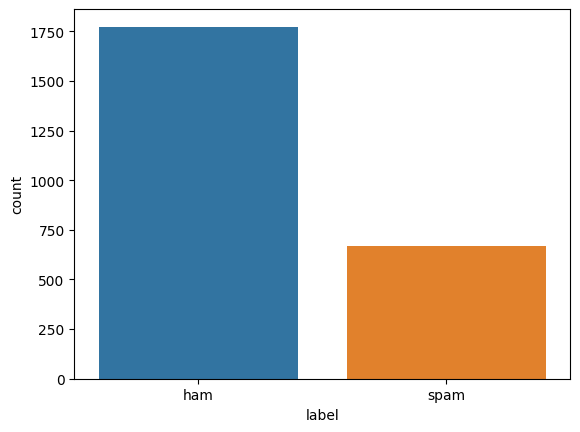

In [2]:
sns.countplot(x=df['label']) # countplot for label

<AxesSubplot: ylabel='count'>

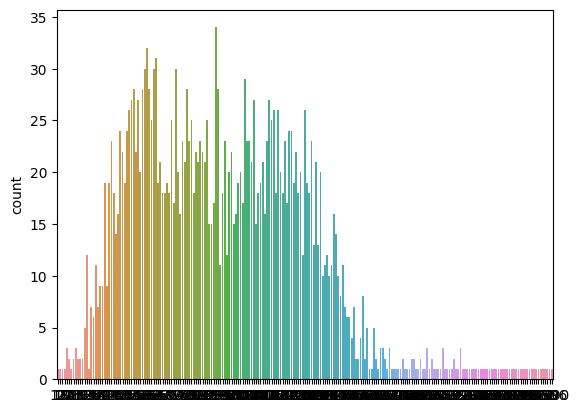

In [3]:
sns.countplot(x=[len(df.loc[i]['message']) for i in range(len(df))])

In [4]:
text_words_lengths = [len(df.loc[i]['message'].split()) for i in range(0, len(df))]
total_length = np.sum(text_words_lengths)
text_words_mean = int(np.mean(text_words_lengths))
print('we have ' + str(total_length) + ' words in our Dataframe')
print('the average word count in every sentence is ' + str(text_words_mean))
text_words_lengths[:5], total_length, text_words_mean

we have 38695 words in our Dataframe
the average word count in every sentence is 15


([14, 22, 19, 11, 17], 38695, 15)